## Bibliotecas

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Conhecendo os dados

### Financeiro

In [2]:
financeiro = pd.read_csv("Financeiro.csv", sep=';', decimal=',')
financeiro.head()

,Mes,Departamento,UF,Item,Faturamento_Produto,Faturamento_Frete,Custo_Produto,Custo_Frete,Custo_Mkt,Desconto_Produto,Desconto_Frete
0,2018-06,Cadeiras,SP,1,149250.0,42984.0,71640,35820,5970,0.0,4776.0
1,2018-06,Cadeiras,SP,2,148050.0,30456.0,76140,25380,4230,0.0,3384.0
2,2018-06,Cadeiras,SP,3,133650.0,21384.0,89100,17820,2970,0.0,2376.0
3,2018-07,Cadeiras,SP,1,314712.5,94784.0,177720,88860,74050,55537.5,23696.0
4,2018-07,Cadeiras,SP,2,392105.0,84352.0,237240,79080,65900,69195.0,21088.0


In [3]:
financeiro.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 108 entries, 0 to 107
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Mes                  108 non-null    object 
 1   Departamento         108 non-null    object 
 2   UF                   108 non-null    object 
 3   Item                 108 non-null    int64  
 4   Faturamento_Produto  108 non-null    float64
 5   Faturamento_Frete    108 non-null    float64
 6   Custo_Produto        108 non-null    int64  
 7   Custo_Frete          108 non-null    int64  
 8   Custo_Mkt            108 non-null    int64  
 9   Desconto_Produto     108 non-null    float64
 10  Desconto_Frete       108 non-null    float64
dtypes: float64(4), int64(4), object(3)
memory usage: 9.4+ KB


### Vendas

In [4]:
vendas = pd.read_csv("Vendas.csv", sep = ';', decimal=',')
vendas.head()

,Mes,Departamento,UF,Item,Vendas
0,2018-06,Cadeiras,SP,1,590
1,2018-06,Cadeiras,SP,2,439
2,2018-06,Cadeiras,SP,3,292
3,2018-07,Cadeiras,SP,1,1469
4,2018-07,Cadeiras,SP,2,1333


In [5]:
vendas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 108 entries, 0 to 107
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Mes           108 non-null    object
 1   Departamento  108 non-null    object
 2   UF            108 non-null    object
 3   Item          108 non-null    int64 
 4   Vendas        108 non-null    int64 
dtypes: int64(2), object(3)
memory usage: 4.3+ KB


### Visitas

In [6]:
visitas = pd.read_csv("Visitas.csv", sep=';', decimal=',')
visitas.head()

,Mes,Departamento,UF,Item,Visitas
0,2018-06,Cadeiras,SP,1,14304
1,2018-06,Cadeiras,SP,2,14258
2,2018-06,Cadeiras,SP,3,14325
3,2018-07,Cadeiras,SP,1,14873
4,2018-07,Cadeiras,SP,2,14849


In [7]:
visitas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 108 entries, 0 to 107
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Mes           108 non-null    object
 1   Departamento  108 non-null    object
 2   UF            108 non-null    object
 3   Item          108 non-null    int64 
 4   Visitas       108 non-null    int64 
dtypes: int64(2), object(3)
memory usage: 4.3+ KB


## Junção das Bases

### Junção das bases Vendas e Financeiro usando INNER JOIN

retorna os registros comuns às duas bases (todas as vendas tem seus dados financeiros respectivos)

In [8]:
df_join1 = pd.merge(financeiro, vendas, how='inner')
df_join1.head()

,Mes,Departamento,UF,Item,Faturamento_Produto,Faturamento_Frete,Custo_Produto,Custo_Frete,Custo_Mkt,Desconto_Produto,Desconto_Frete,Vendas
0,2018-06,Cadeiras,SP,1,149250.0,42984.0,71640,35820,5970,0.0,4776.0,590
1,2018-06,Cadeiras,SP,2,148050.0,30456.0,76140,25380,4230,0.0,3384.0,439
2,2018-06,Cadeiras,SP,3,133650.0,21384.0,89100,17820,2970,0.0,2376.0,292
3,2018-07,Cadeiras,SP,1,314712.5,94784.0,177720,88860,74050,55537.5,23696.0,1469
4,2018-07,Cadeiras,SP,2,392105.0,84352.0,237240,79080,65900,69195.0,21088.0,1333


In [9]:
df_join1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 108 entries, 0 to 107
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Mes                  108 non-null    object 
 1   Departamento         108 non-null    object 
 2   UF                   108 non-null    object 
 3   Item                 108 non-null    int64  
 4   Faturamento_Produto  108 non-null    float64
 5   Faturamento_Frete    108 non-null    float64
 6   Custo_Produto        108 non-null    int64  
 7   Custo_Frete          108 non-null    int64  
 8   Custo_Mkt            108 non-null    int64  
 9   Desconto_Produto     108 non-null    float64
 10  Desconto_Frete       108 non-null    float64
 11  Vendas               108 non-null    int64  
dtypes: float64(4), int64(5), object(3)
memory usage: 11.0+ KB


### Junção das bases Visitas com (Vendas + Financeiro) usando LEFT JOIN

Retorna como resultado todos os registros que estão na base Visitas e os registros da base Vendas que são comuns à base Visitas (podem haver visitas que não terminaram em venda)

In [10]:
df_join2 = pd.merge(visitas, df_join1, how='left')
df_join2.head()

,Mes,Departamento,UF,Item,Visitas,Faturamento_Produto,Faturamento_Frete,Custo_Produto,Custo_Frete,Custo_Mkt,Desconto_Produto,Desconto_Frete,Vendas
0,2018-06,Cadeiras,SP,1,14304,149250.0,42984.0,71640,35820,5970,0.0,4776.0,590
1,2018-06,Cadeiras,SP,2,14258,148050.0,30456.0,76140,25380,4230,0.0,3384.0,439
2,2018-06,Cadeiras,SP,3,14325,133650.0,21384.0,89100,17820,2970,0.0,2376.0,292
3,2018-07,Cadeiras,SP,1,14873,314712.5,94784.0,177720,88860,74050,55537.5,23696.0,1469
4,2018-07,Cadeiras,SP,2,14849,392105.0,84352.0,237240,79080,65900,69195.0,21088.0,1333


In [12]:
df_join2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 108 entries, 0 to 107
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Mes                  108 non-null    object 
 1   Departamento         108 non-null    object 
 2   UF                   108 non-null    object 
 3   Item                 108 non-null    int64  
 4   Visitas              108 non-null    int64  
 5   Faturamento_Produto  108 non-null    float64
 6   Faturamento_Frete    108 non-null    float64
 7   Custo_Produto        108 non-null    int64  
 8   Custo_Frete          108 non-null    int64  
 9   Custo_Mkt            108 non-null    int64  
 10  Desconto_Produto     108 non-null    float64
 11  Desconto_Frete       108 non-null    float64
 12  Vendas               108 non-null    int64  
dtypes: float64(4), int64(6), object(3)
memory usage: 11.8+ KB


## Criação do arquivo .csv com a base única criada

In [13]:
df_join2.to_csv('df.csv', sep=',', encoding='utf-8', index=False)

### Leitura da base criada

In [14]:
df = pd.read_csv('df.csv')
df.head()

,Mes,Departamento,UF,Item,Visitas,Faturamento_Produto,Faturamento_Frete,Custo_Produto,Custo_Frete,Custo_Mkt,Desconto_Produto,Desconto_Frete,Vendas
0,2018-06,Cadeiras,SP,1,14304,149250.0,42984.0,71640,35820,5970,0.0,4776.0,590
1,2018-06,Cadeiras,SP,2,14258,148050.0,30456.0,76140,25380,4230,0.0,3384.0,439
2,2018-06,Cadeiras,SP,3,14325,133650.0,21384.0,89100,17820,2970,0.0,2376.0,292
3,2018-07,Cadeiras,SP,1,14873,314712.5,94784.0,177720,88860,74050,55537.5,23696.0,1469
4,2018-07,Cadeiras,SP,2,14849,392105.0,84352.0,237240,79080,65900,69195.0,21088.0,1333


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 108 entries, 0 to 107
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Mes                  108 non-null    object 
 1   Departamento         108 non-null    object 
 2   UF                   108 non-null    object 
 3   Item                 108 non-null    int64  
 4   Visitas              108 non-null    int64  
 5   Faturamento_Produto  108 non-null    float64
 6   Faturamento_Frete    108 non-null    float64
 7   Custo_Produto        108 non-null    int64  
 8   Custo_Frete          108 non-null    int64  
 9   Custo_Mkt            108 non-null    int64  
 10  Desconto_Produto     108 non-null    float64
 11  Desconto_Frete       108 non-null    float64
 12  Vendas               108 non-null    int64  
dtypes: float64(4), int64(6), object(3)
memory usage: 11.1+ KB


## Análise

### Quais os departamentos com mais faturamento?

### Quais os departamentos com mais lucro?

### Qual ação você sugere como mais efetiva para aumento de vendas? (investimento em propaganda, desconto em preço ou desconto em frete) Por quê?

### Cite outras conclusões importantes você conseguiu analisar.

## agregando bases externas com as existentes

### Monte um plano de negócio de crescimento de 3 anos para empresa (levando em consideração ser uma empresa de e-commerce) baseado em geração de caixa (não esqueça de se basear em números)

### Cite outras informações internas que você gostaria de ter para melhorar a projeção de 3 anos e justifique porquê seriam úteis na sua análise

## Heatmap (correlação)

Text(0.5, 1.0, 'Correlation Heatmap')

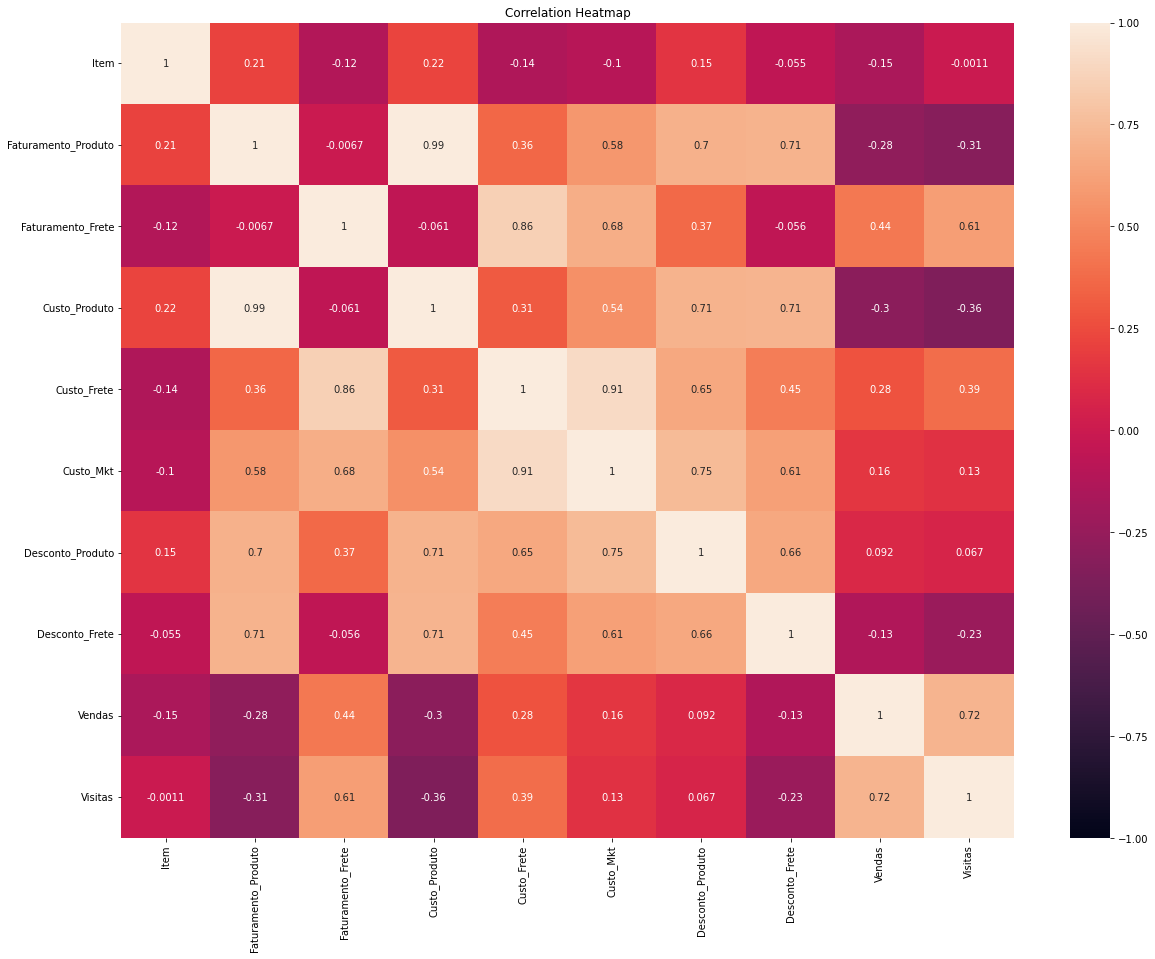

In [64]:
plt.figure(figsize=(20,15))
heatmap = sns.heatmap(df_join2.corr(), vmin=-1, vmax=1, annot=True)
heatmap.set_title('Correlation Heatmap')

## Pontos que gostaria de ter feito mais não deu tempo, ou não tem conhecimento mas gostaria de aprender.